In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
train = pd.read_csv("Data/train.csv", parse_dates=["pickup_datetime", "dropoff_datetime"])
test = pd.read_csv("Data/test.csv", parse_dates=["pickup_datetime"])

In [87]:
display(train, test)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98215,40.76794,-73.96463,40.76560,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98042,40.73856,-73.99948,40.73115,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.97903,40.76394,-74.00533,40.71009,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01004,40.71997,-74.01227,40.70672,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97305,40.79321,-73.97292,40.78252,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.98220,40.74552,-73.99491,40.74017,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.00095,40.74738,-73.97018,40.79655,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.95913,40.76880,-74.00443,40.70737,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.98208,40.74906,-73.97463,40.75711,N,373


,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.98813,40.73203,-73.99017,40.75668,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.96420,40.67999,-73.95981,40.65540,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.99744,40.73758,-73.98616,40.72952,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.95607,40.77190,-73.98643,40.73047,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.97021,40.76147,-73.96151,40.75589,N
...,...,...,...,...,...,...,...,...,...
625129,id3008929,1,2016-01-01 00:02:52,1,-74.00346,40.72511,-74.00125,40.73364,N
625130,id3700764,1,2016-01-01 00:01:52,1,-74.00636,40.74378,-73.95341,40.78247,N
625131,id2568735,1,2016-01-01 00:01:24,2,-73.97227,40.75986,-73.87660,40.74866,N
625132,id1384355,1,2016-01-01 00:00:28,1,-73.97650,40.73356,-73.85426,40.89179,N


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [89]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  625134 non-null  object        
 1   vendor_id           625134 non-null  int64         
 2   pickup_datetime     625134 non-null  datetime64[ns]
 3   passenger_count     625134 non-null  int64         
 4   pickup_longitude    625134 non-null  float64       
 5   pickup_latitude     625134 non-null  float64       
 6   dropoff_longitude   625134 non-null  float64       
 7   dropoff_latitude    625134 non-null  float64       
 8   store_and_fwd_flag  625134 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 42.9+ MB


In [90]:
pd.options.display.float_format = '{:.5f}'.format

In [91]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000,1458644.00000
mean,1.53495,1.66453,-73.97349,40.75092,-73.97342,40.75180,959.49227
std,0.49878,1.31424,0.07090,0.03288,0.07064,0.03589,5237.43172
min,1.00000,0.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73588,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96301,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,3526282.00000


In [92]:
test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000,625134.00000
mean,1.53488,1.66177,-73.97361,40.75093,-73.97346,40.75182
std,0.49878,1.31129,0.07339,0.02985,0.07256,0.03582
min,1.00000,0.00000,-121.93313,37.38959,-121.93333,36.60132
25%,1.00000,1.00000,-73.99185,40.73739,-73.99132,40.73600
50%,2.00000,1.00000,-73.98174,40.75409,-73.97977,40.75454
75%,2.00000,2.00000,-73.96740,40.76839,-73.96301,40.76985
max,2.00000,9.00000,-69.24892,42.81494,-67.49680,48.85760


<AxesSubplot: >

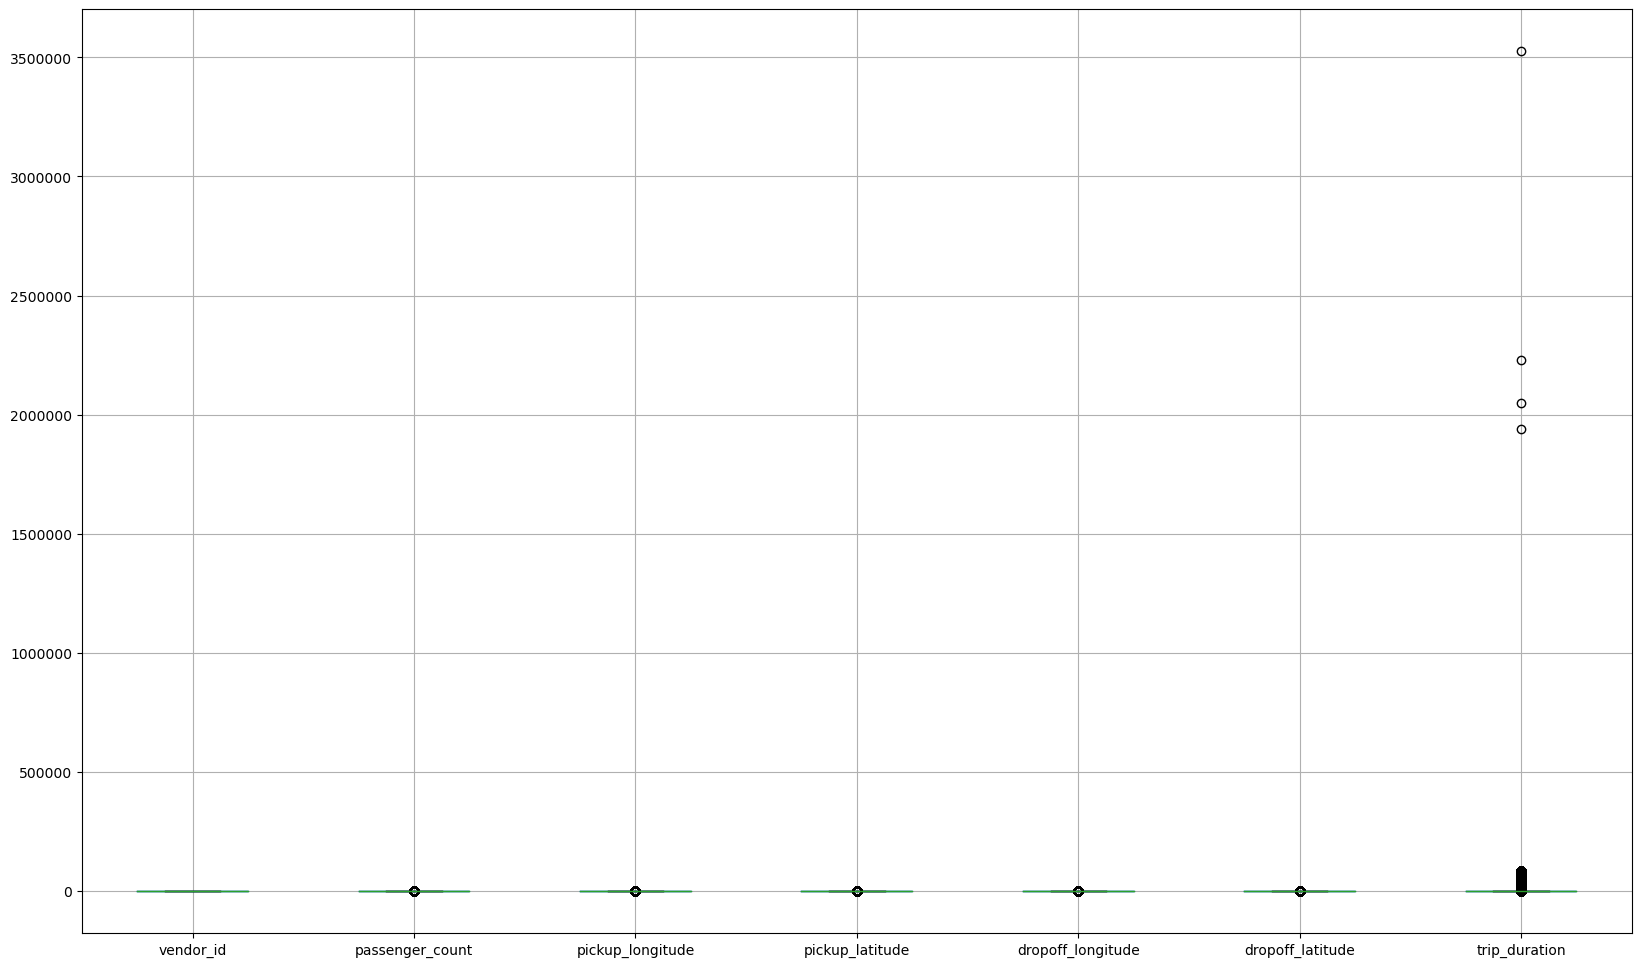

In [93]:
plt.figure(figsize=(20,12)) # size 조절
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
train.boxplot() # boxplot : data가 숫자일 때 좋음, data 분포를 파악하기 위해 사용

<AxesSubplot: >

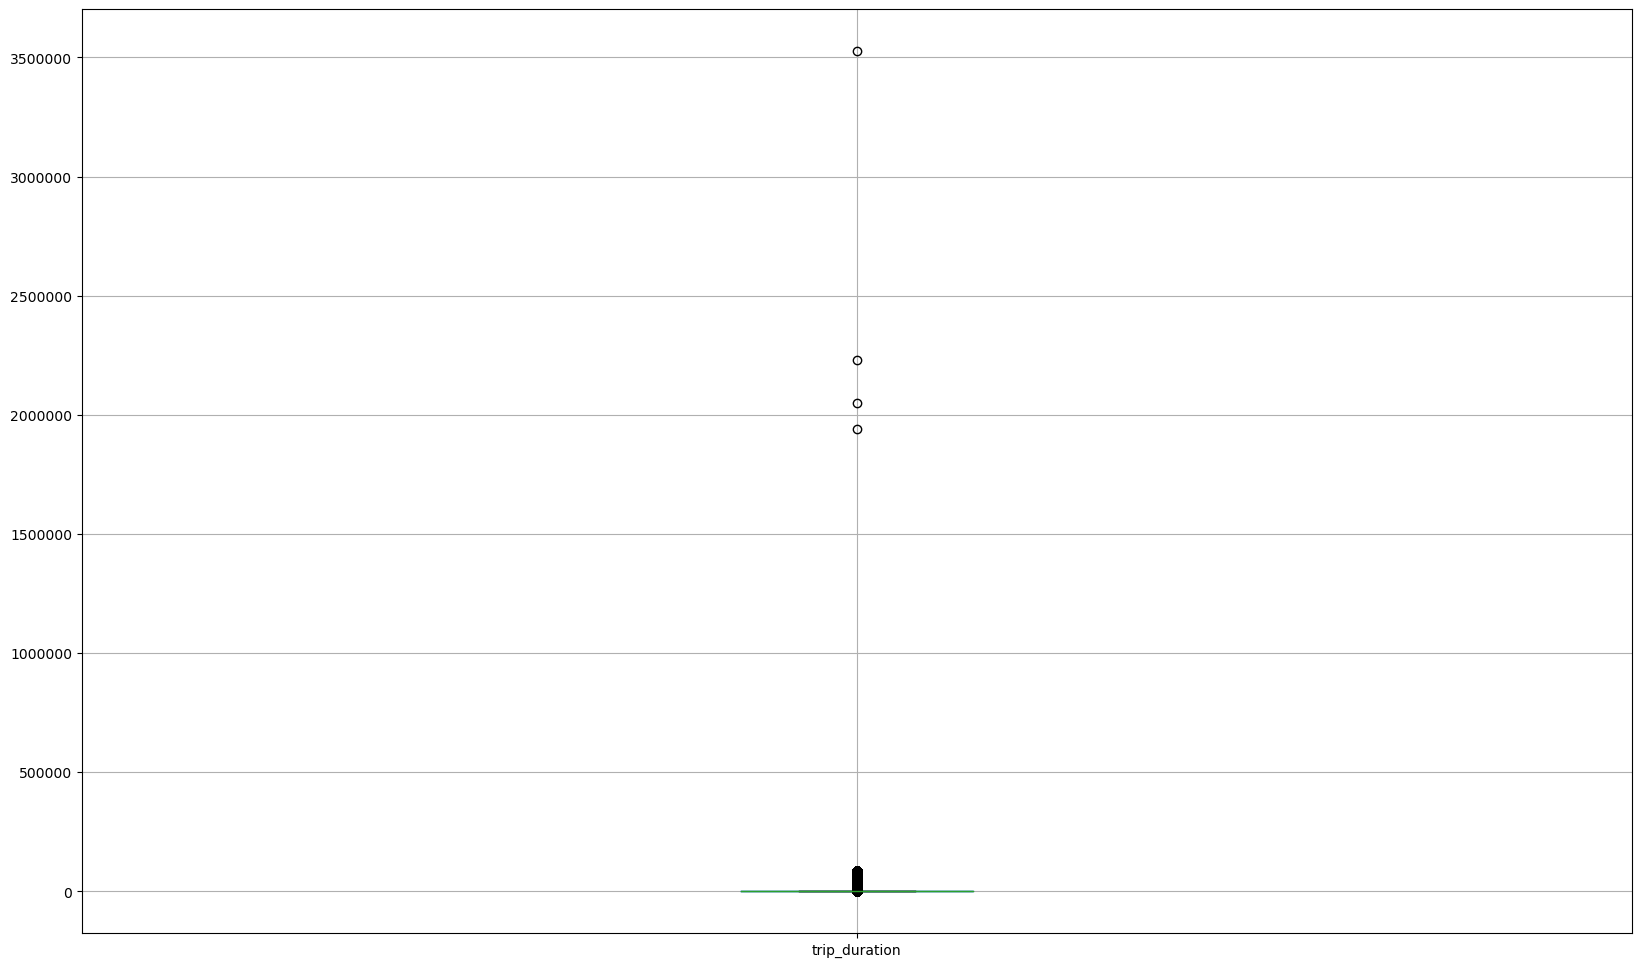

In [94]:
plt.figure(figsize=(20,12)) # size 조절
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
train.boxplot(column="trip_duration", return_type = 'axes')

In [95]:
train = train[(train.trip_duration < 1500000)]

<AxesSubplot: >

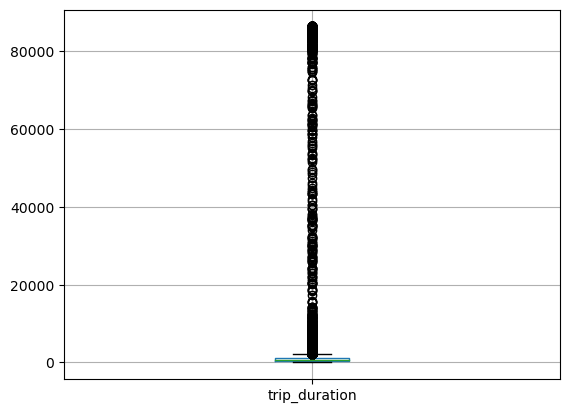

In [96]:
train.boxplot(column="trip_duration", return_type = 'axes')

<AxesSubplot: >

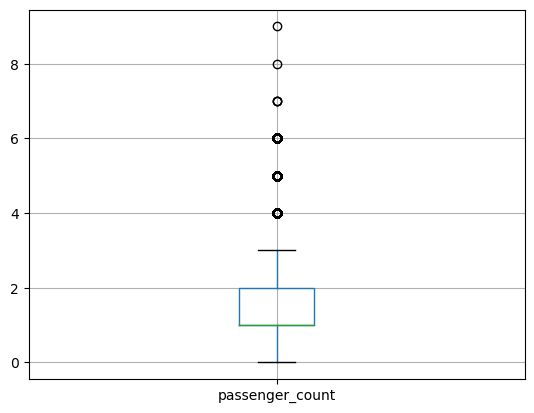

In [97]:
train.boxplot(column="passenger_count", return_type = 'axes')

In [98]:
train = train[(train.passenger_count > 0)]

<AxesSubplot: >

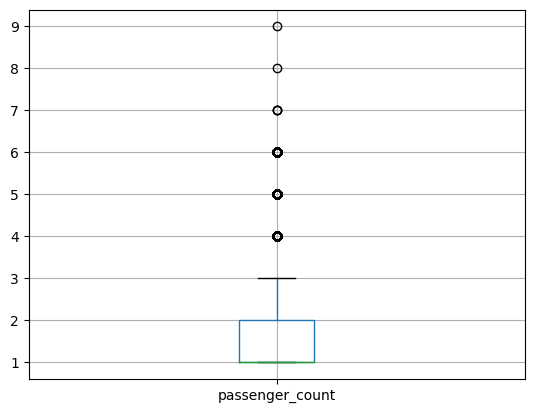

In [99]:
train.boxplot(column="passenger_count", return_type = 'axes')

In [100]:
train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000,1458580.00000
mean,1.53495,1.66460,-73.97349,40.75092,-73.97342,40.75180,952.78376
std,0.49878,1.31423,0.07090,0.03288,0.07064,0.03589,3170.60179
min,1.00000,1.00000,-121.93334,34.35970,-121.93330,32.18114,1.00000
25%,1.00000,1.00000,-73.99187,40.73735,-73.99133,40.73589,397.00000
50%,2.00000,1.00000,-73.98174,40.75410,-73.97975,40.75452,662.00000
75%,2.00000,2.00000,-73.96733,40.76836,-73.96302,40.76981,1075.00000
max,2.00000,9.00000,-61.33553,51.88108,-61.33553,43.92103,86392.00000


In [101]:
train = train[(train.pickup_longitude > -120)]
train = train[(train.dropoff_longitude > -120)]

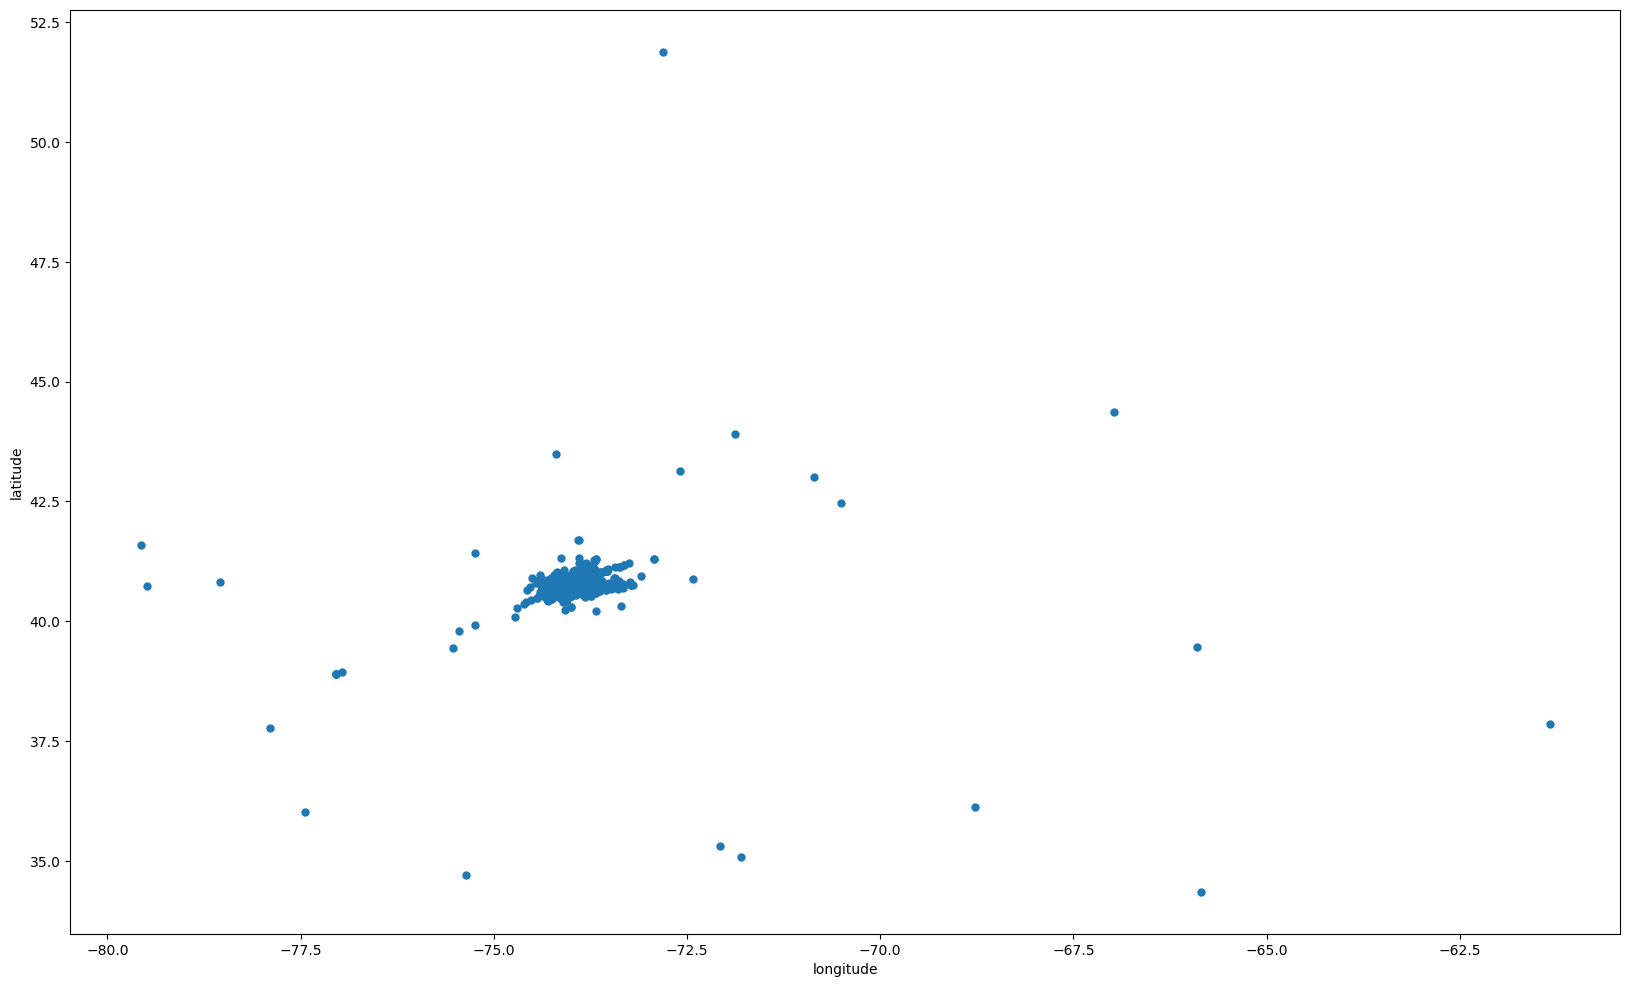

In [102]:
pickup_ln = list(train.pickup_longitude)
pickup_la = list(train.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(pickup_ln, pickup_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

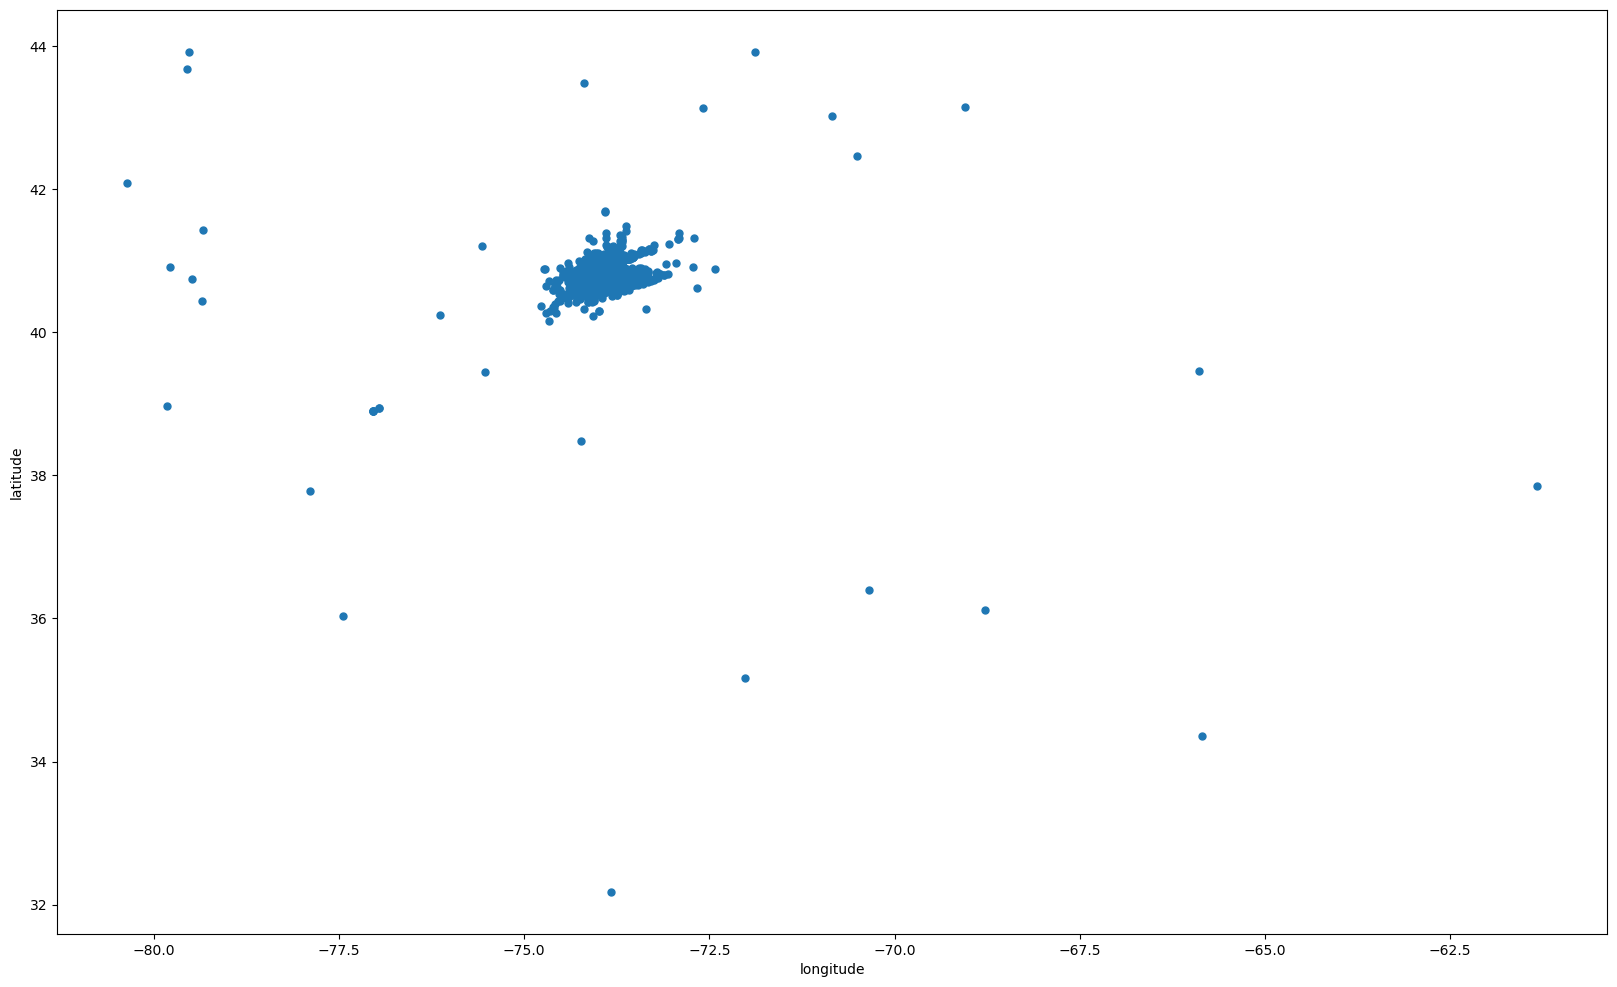

In [103]:
dropoff_ln = list(train.dropoff_longitude)
dropoff_la = list(train.dropoff_latitude)
plt.figure(figsize=(20,12))
plt.plot(dropoff_ln, dropoff_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

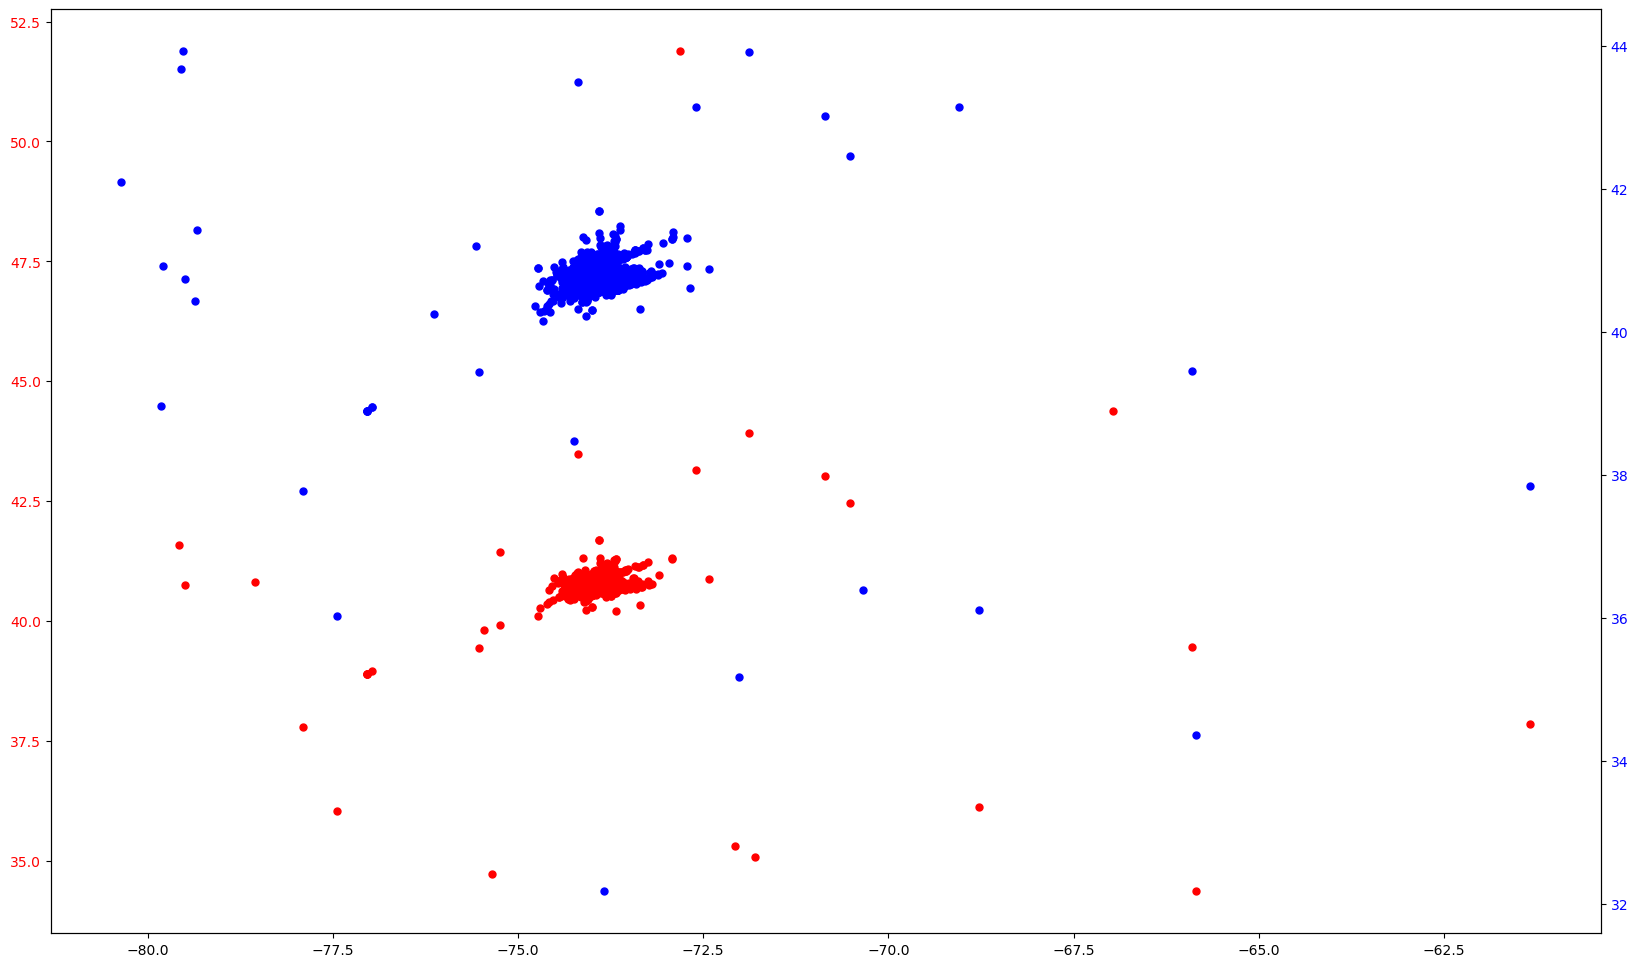

In [104]:
plt.figure(figsize=(20,12))

# pickup
ax1 = plt.subplot()
ax1.plot(pickup_ln, pickup_la, '.', color="red", alpha = 1, markersize = 10)
ax1.tick_params(axis='y', labelcolor="red")

#dropoff
ax2 = plt.twinx()
ax2.plot(dropoff_ln, dropoff_la, '.', color="blue", alpha = 1, markersize = 10)
ax2.tick_params(axis='y', labelcolor="blue")

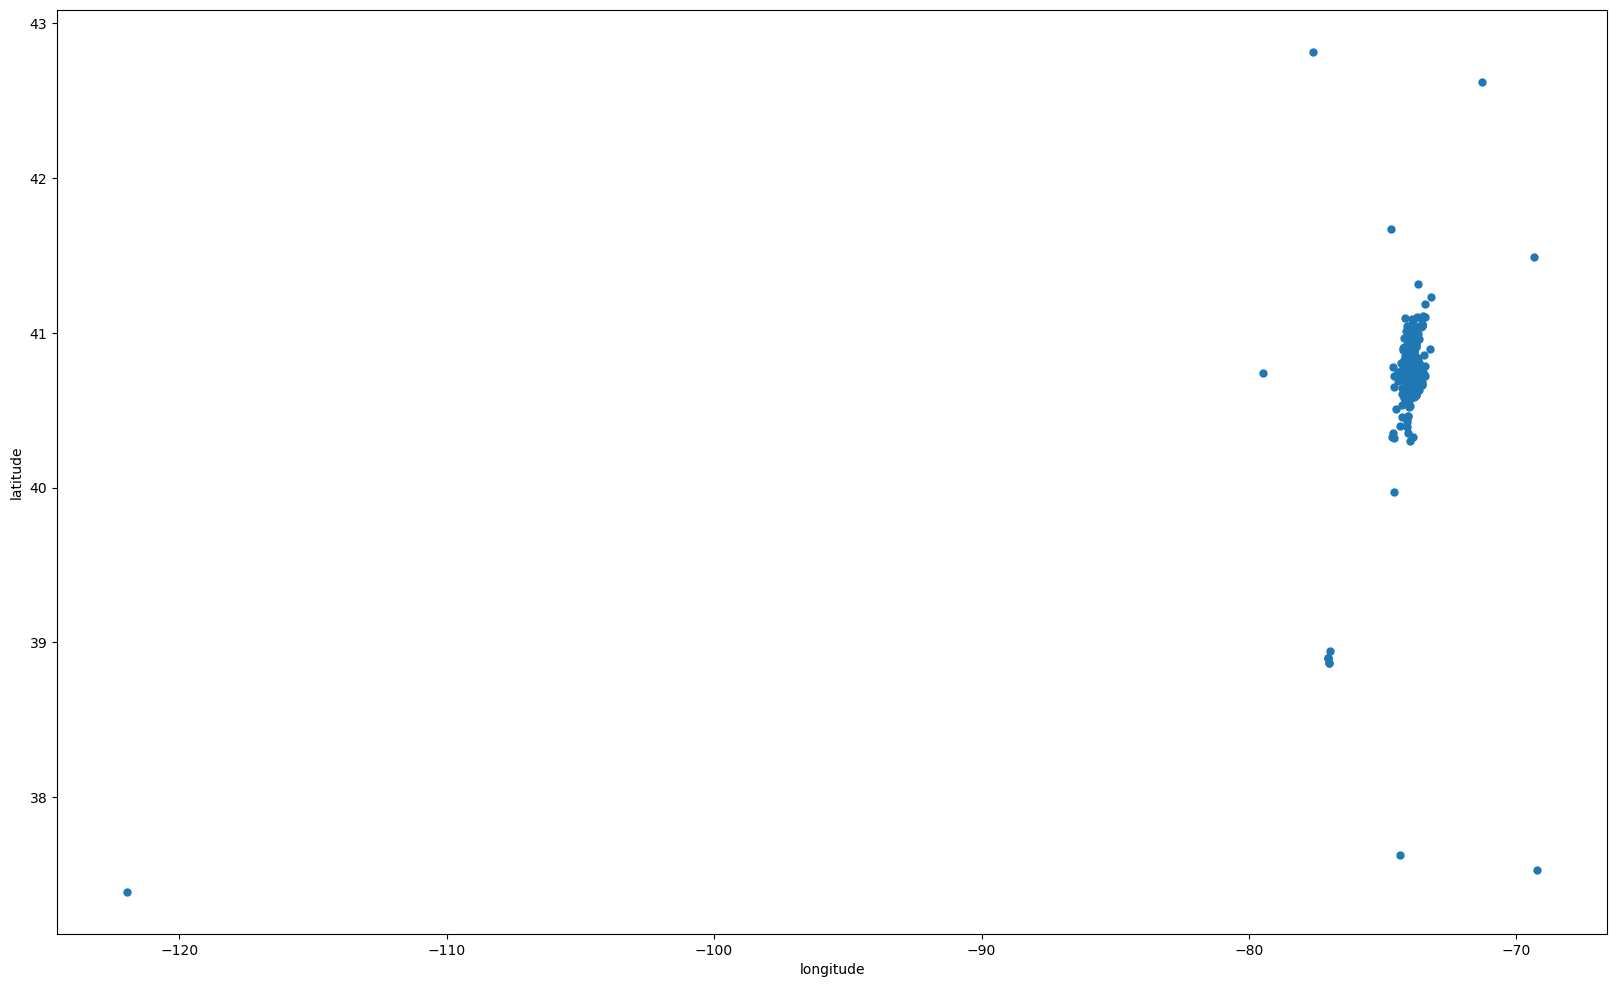

In [105]:
test_ln = list(test.pickup_longitude)
test_la = list(test.pickup_latitude)
plt.figure(figsize=(20,12))
plt.plot(test_ln, test_la, '.', alpha = 1, markersize = 10)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

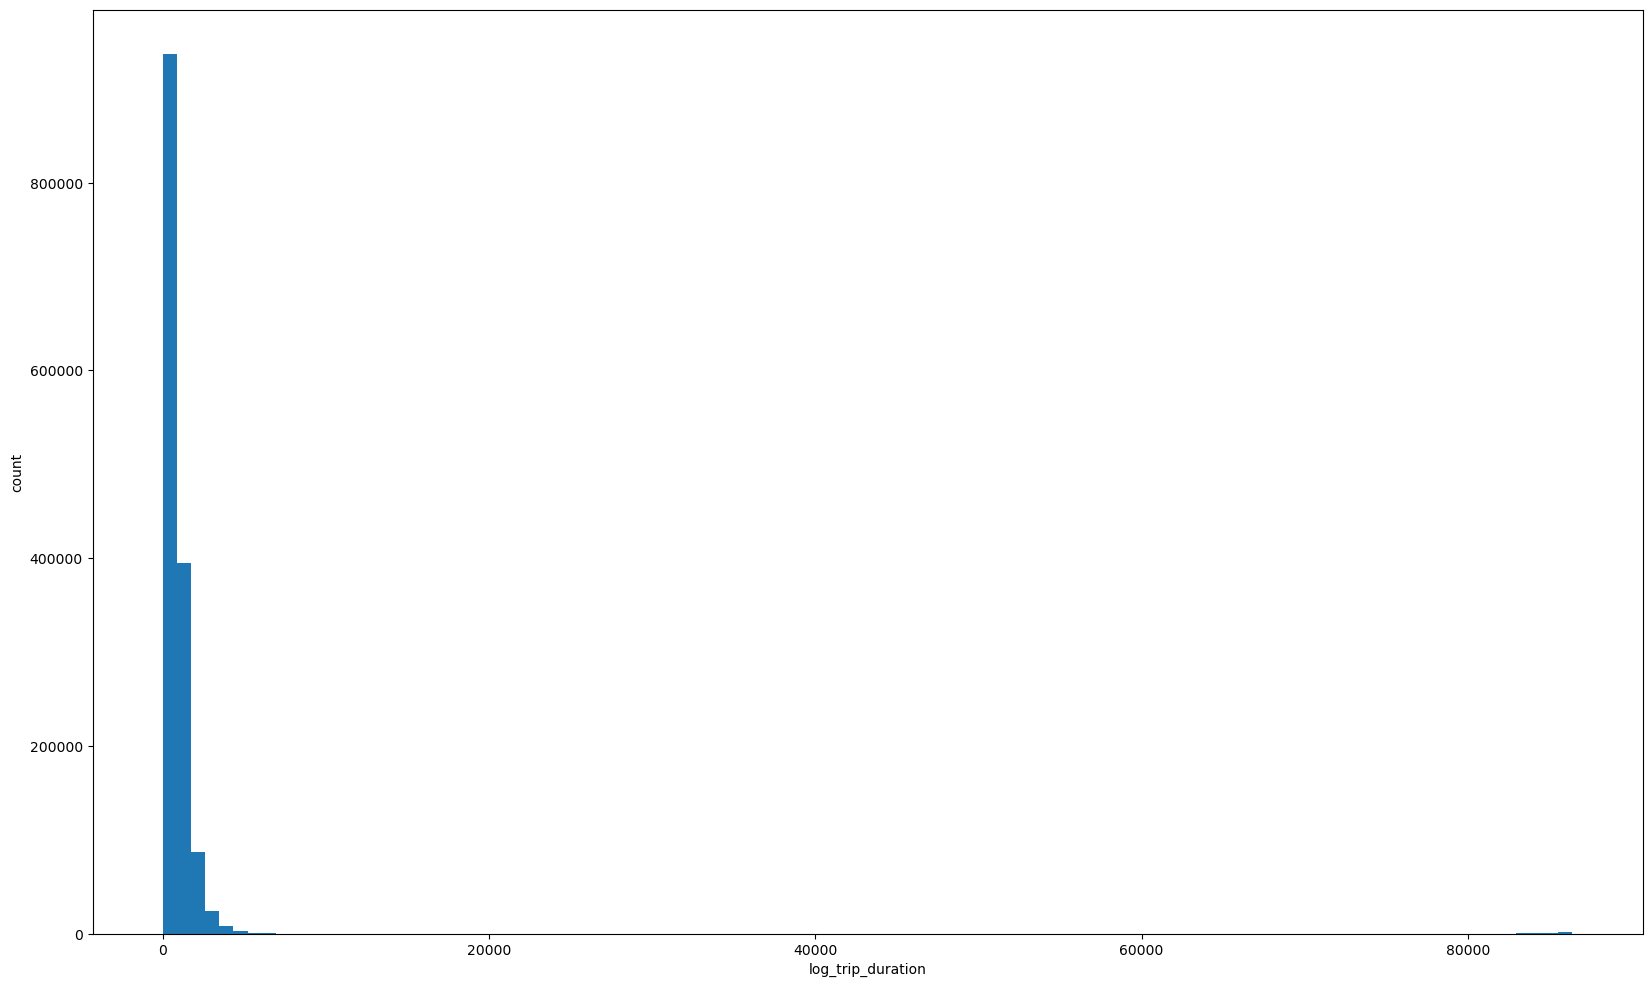

In [106]:
plt.figure(figsize=(20,12))
plt.hist(train['trip_duration'].values, bins = 100)
plt.xlabel("log_trip_duration")
plt.ylabel("count")
plt.show()

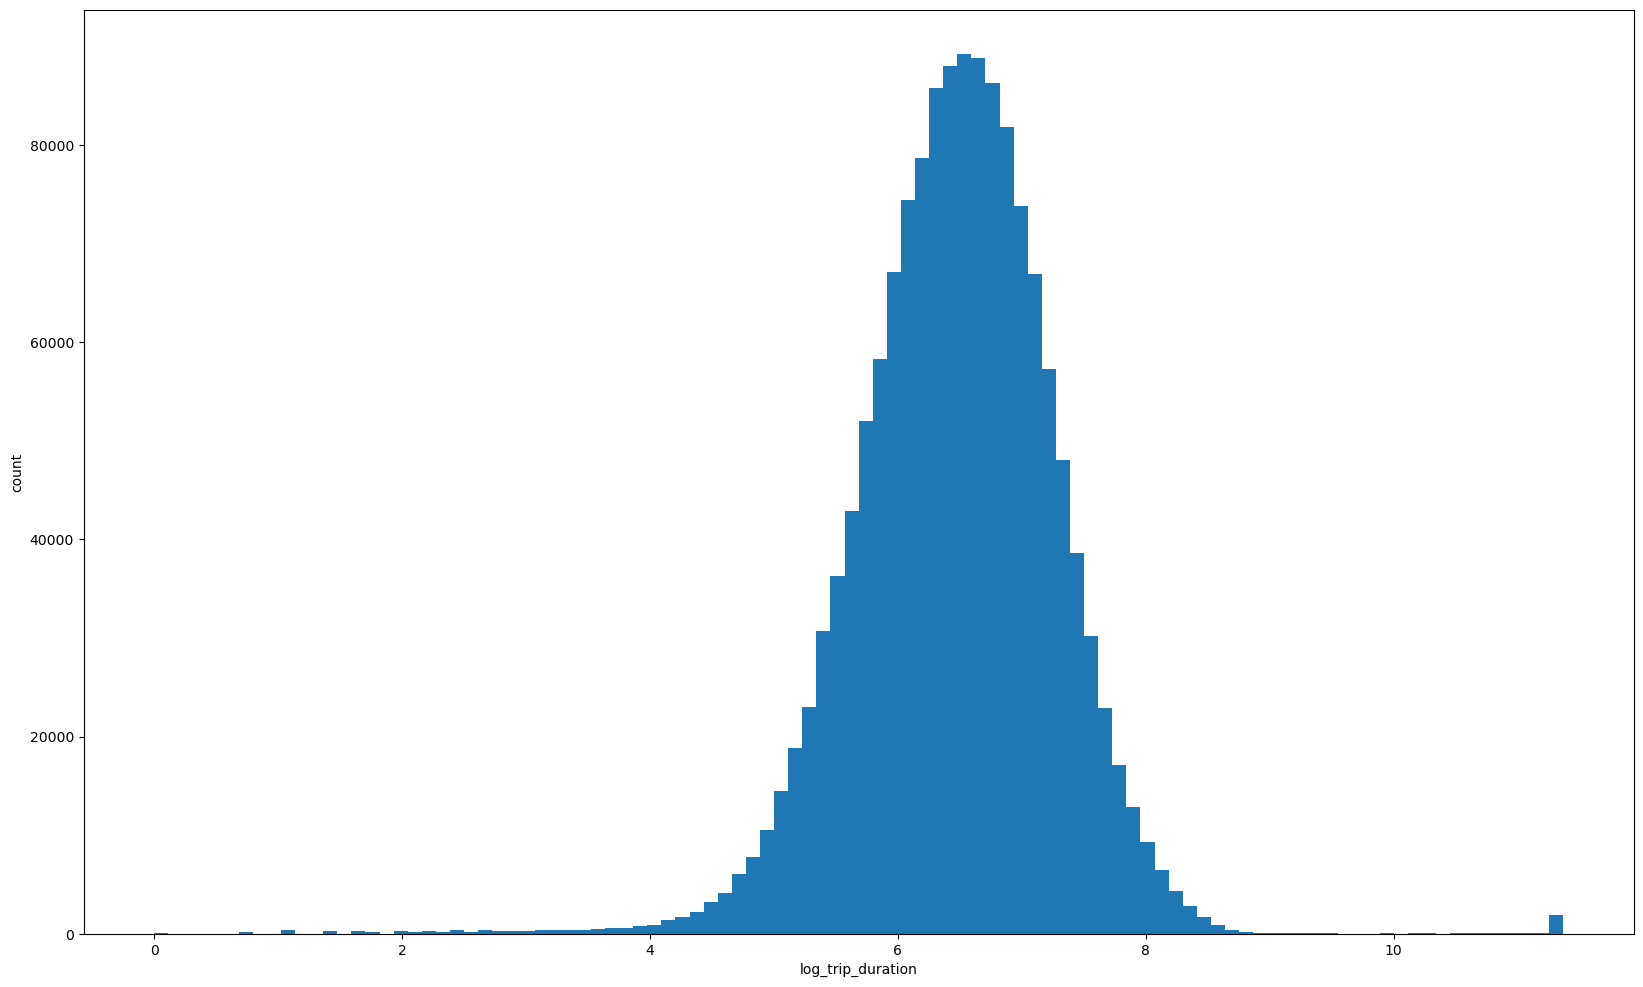

In [107]:
plt.figure(figsize=(20,12))
plt.hist(np.log(train['trip_duration'].values), bins = 100)
plt.xlabel("log_trip_duration")
plt.ylabel("count")
plt.show()

In [109]:
train = train[(train.trip_duration < 80000)]

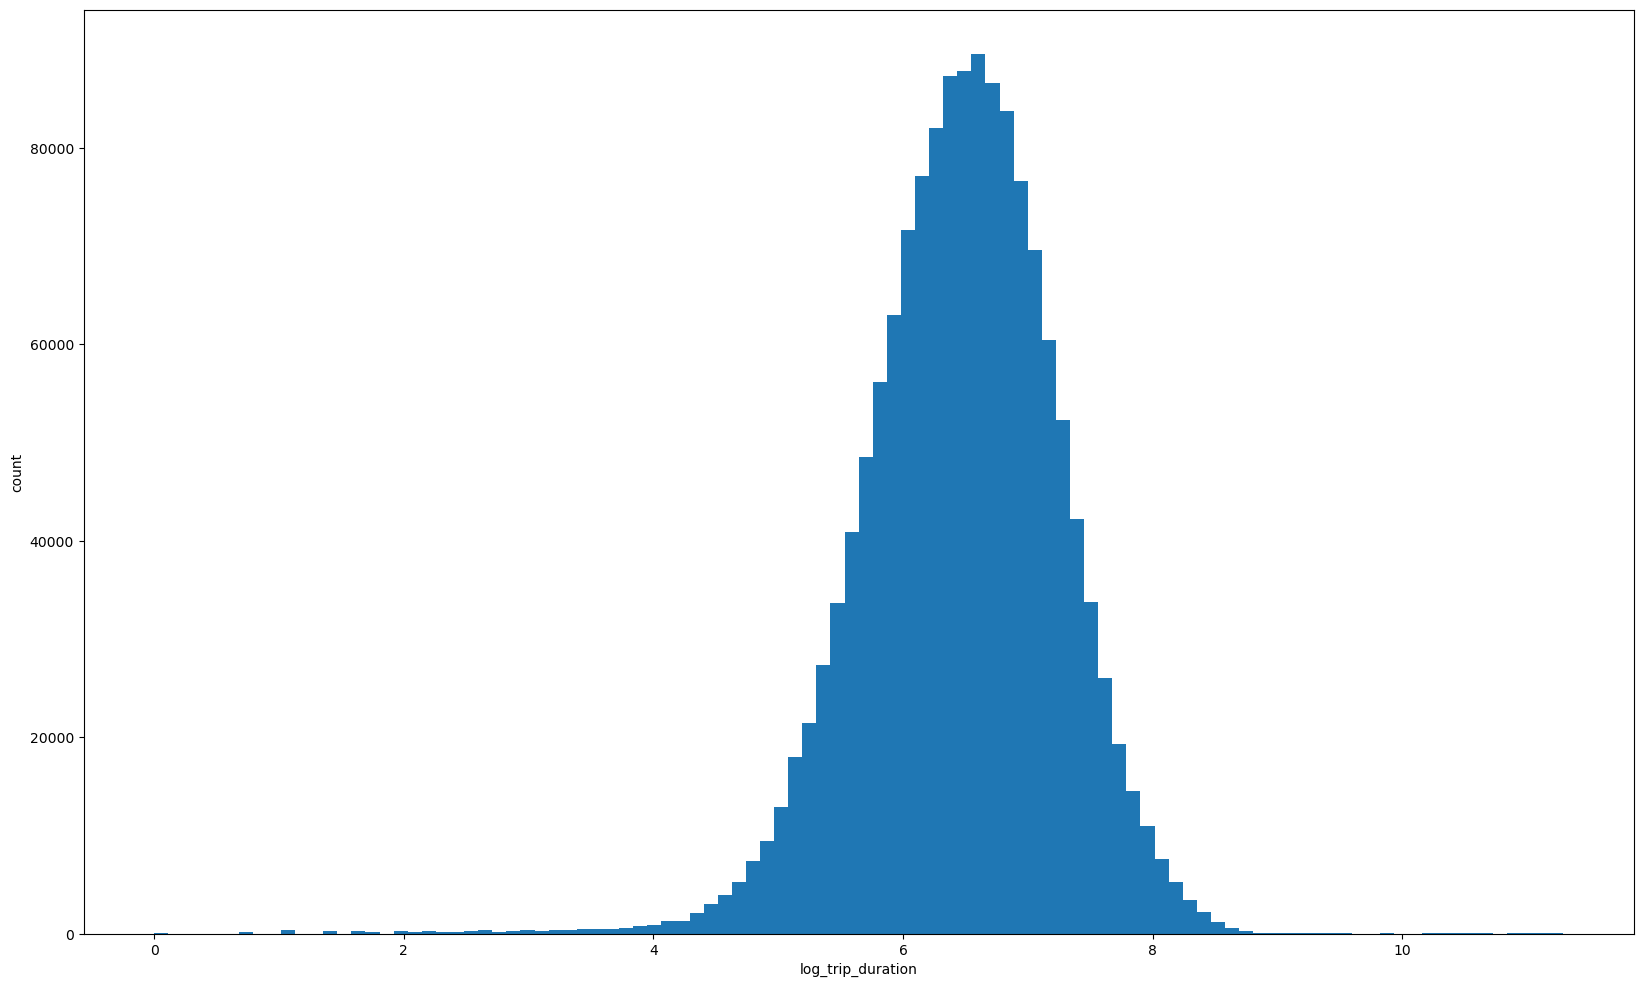

In [110]:
plt.figure(figsize=(20,12))
plt.hist(np.log(train['trip_duration'].values), bins = 100)
plt.xlabel("log_trip_duration")
plt.ylabel("count")
plt.show()